# Melbourne Housing Market: Multiple Linear Regression

EDA - Visualization - Modeling

<img src="https://i.imgur.com/dXIK3yX.jpg" width="600px">

Photo by [Breno Assis](https://unsplash.com/photos/r3WAWU5Fi5Q) on Unsplash

## 1. Dataset

https://www.kaggle.com/anthonypino/melbourne-housing-market

* Suburb: Suburb
* Address: Address
* Rooms: Number of rooms
* Price: Price in Australian dollars
* Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.
* Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.
* SellerG: Real Estate Agent
* Date: Date sold
* Distance: Distance from CBD in Kilometres
* Regionname: General Region (West, North West, North, North east ...etc)
* Propertycount: Number of properties that exist in the suburb.
* Bedroom2 : Scraped # of Bedrooms (from different source)
* Bathroom: Number of Bathrooms
* Car: Number of carspots
* Landsize: Land Size in Metres
* BuildingArea: Building Size in Metres
* YearBuilt: Year the house was built
* CouncilArea: Governing council for the area
* Lattitude: Self explanitory
* Longtitude: Self explanitory

Dataset downloaded from Kaggle on the 2020/01/05

## 2. Exploratory Data Analysis

### 2.1 Explore the dataset structure

In [55]:
# Version v01-02
# Import all libraries
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt # ploting the data
import seaborn as sns # ploting the data
import math # calculation

In [56]:
# Set up color blind friendly color palette
# The palette with grey:
cbPalette = ["#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]
# The palette with black:
cbbPalette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

# sns.palplot(sns.color_palette(cbPalette))
# sns.palplot(sns.color_palette(cbbPalette))

sns.set_palette(cbPalette)
#sns.set_palette(cbbPalette)

In [57]:
# Load the dataset
price_less = pd.read_csv('Data/MELBOURNE_HOUSE_PRICES_LESS.csv')
#price_less = pd.read_csv('../input/melbourne-housing-market/MELBOURNE_HOUSE_PRICES_LESS.csv')
# price_full = pd.read_csv('Data/Melbourne_housing_FULL.csv')

In [58]:
price_less.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
Suburb           63023 non-null object
Address          63023 non-null object
Rooms            63023 non-null int64
Type             63023 non-null object
Price            48433 non-null float64
Method           63023 non-null object
SellerG          63023 non-null object
Date             63023 non-null object
Postcode         63023 non-null int64
Regionname       63023 non-null object
Propertycount    63023 non-null int64
Distance         63023 non-null float64
CouncilArea      63023 non-null object
dtypes: float64(2), int64(3), object(8)
memory usage: 6.3+ MB


In [59]:
# price_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

In [60]:
price_less.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
5,Airport West,4/32 Earl St,2,t,530000.0,S,Jellis,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
6,Airport West,3/74 Hawker St,2,u,540000.0,S,Barry,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
7,Airport West,1/26 Highridge Cr,3,h,715000.0,SP,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
8,Albanvale,1 Jackson Cct,6,h,NaN,PI,hockingstuart,1/04/2017,3021,Western Metropolitan,1899,14.0,Brimbank City Council
9,Albert Park,18 Mills St,3,h,1925000.0,S,Cayzer,1/04/2017,3206,Southern Metropolitan,3280,3.0,Port Phillip City Council


In [61]:
# price_full.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,6/08/2016,2.5,3067.0,...,2.0,2.0,400.0,220.0,2006.0,Yarra City Council,-37.7965,144.9965,Northern Metropolitan,4019.0
8,Abbotsford,53 Turner St,2,h,NaN,S,Biggin,6/08/2016,2.5,3067.0,...,1.0,2.0,201.0,NaN,1900.0,Yarra City Council,-37.7995,144.9974,Northern Metropolitan,4019.0
9,Abbotsford,99 Turner St,2,h,NaN,S,Collins,6/08/2016,2.5,3067.0,...,2.0,1.0,202.0,NaN,1900.0,Yarra City Council,-37.7996,144.9989,Northern Metropolitan,4019.0


In [62]:
# Determine the number of missing values for every column
price_less.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price            14590
Method               0
SellerG              0
Date                 0
Postcode             0
Regionname           0
Propertycount        0
Distance             0
CouncilArea          0
dtype: int64

In [63]:
# Exclude rows with missing prices
data_filtered = price_less.loc[price_less['Price'] > 0]
data_filtered.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Postcode         0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
dtype: int64

In [64]:
# price_full.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

### 2.2 Explore the continous variables

In [117]:
data = data_filtered.copy()

In [118]:
data.describe()

,Rooms,Price,Postcode,Propertycount,Distance
count,48433.000000,4.843300e+04,48433.000000,48433.000000,48433.000000
mean,3.071666,9.978982e+05,3123.210332,7566.399913,12.702761
std,0.944708,5.934989e+05,125.534940,4457.405884,7.550030
min,1.000000,8.500000e+04,3000.000000,39.000000,0.000000
25%,2.000000,6.200000e+05,3051.000000,4280.000000,7.000000
50%,3.000000,8.300000e+05,3103.000000,6567.000000,11.700000
75%,4.000000,1.220000e+06,3163.000000,10412.000000,16.700000
max,31.000000,1.120000e+07,3980.000000,21650.000000,55.800000


In [67]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Postcode', 'Regionname', 'Propertycount', 'Distance',
       'CouncilArea'],
      dtype='object')

In [69]:
data['Price'].describe()

count    4.843300e+04
mean     9.978982e+05
std      5.934989e+05
min      8.500000e+04
25%      6.200000e+05
50%      8.300000e+05
75%      1.220000e+06
max      1.120000e+07
Name: Price, dtype: float64

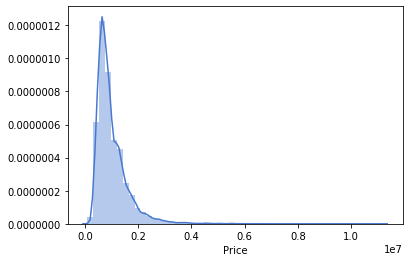

In [70]:
x = 'Price'
sns.set_palette("muted")
sns.distplot(data[x])
plt.ioff()
sns.set_palette(cbPalette)

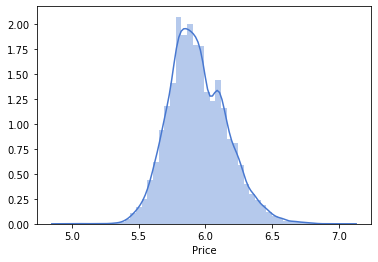

In [71]:
# Log transform the Price variable to approach a normal distribution
x = np.log10(data["Price"])
sns.set_palette("muted")
sns.distplot(x)
plt.ioff()
sns.set_palette(cbPalette)

In [72]:
# data["Price"] = np.log10(data.loc[:, "Price"].values)

In [73]:
# data["Price"] = np.log10(data.loc[:, "Price"].values)

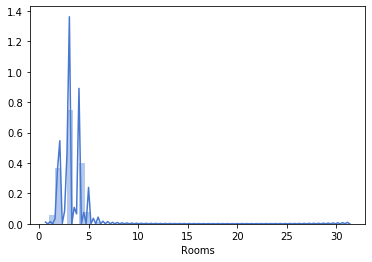

In [74]:
x = 'Rooms'
sns.set_palette("muted")
sns.distplot(data[x])
plt.ioff()
sns.set_palette(cbPalette)

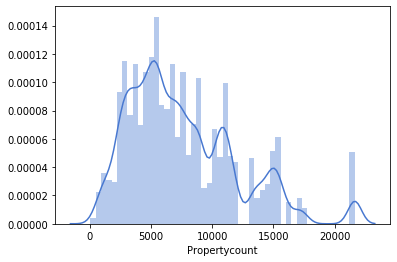

In [75]:
x = 'Propertycount'
sns.set_palette("muted")
sns.distplot(data[x])
plt.ioff()
sns.set_palette(cbPalette)

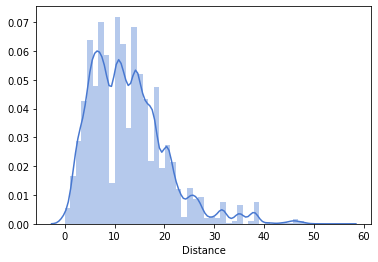

In [76]:
x = 'Distance'
sns.set_palette("muted")
sns.distplot(data[x])
plt.ioff()
sns.set_palette(cbPalette)

### 2.1 Explore the categorical variables

In [77]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [78]:
# data.shape

(48433, 13)

In [79]:
# data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Postcode', 'Regionname', 'Propertycount', 'Distance',
       'CouncilArea'],
      dtype='object')

In [80]:
#  https://www.datacamp.com/community/tutorials/categorical-data
data['Suburb'].value_counts().count()

370

In [81]:
#  https://www.datacamp.com/community/tutorials/categorical-data
data['Address'].value_counts().count()

44739

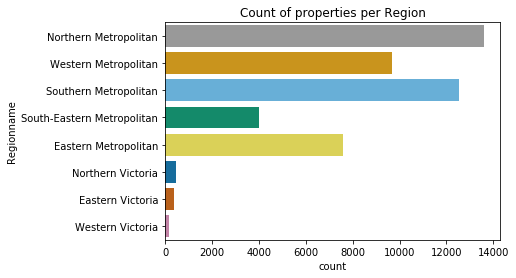

In [82]:
# https://seaborn.pydata.org/generated/seaborn.countplot.html
title = 'Count of properties per Region'
sns.countplot(y = data['Regionname'])
plt.title(title)
plt.ioff()

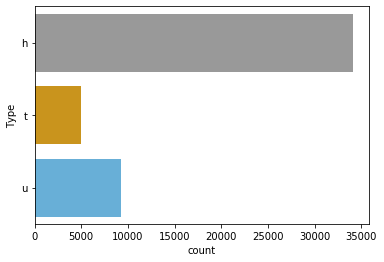

In [83]:
# https://seaborn.pydata.org/generated/seaborn.countplot.html
title = ''
sns.countplot(y = data['Type'])
plt.title(title)
plt.ioff()

In [84]:
#  https://www.datacamp.com/community/tutorials/categorical-data
# data['Method'].value_counts()

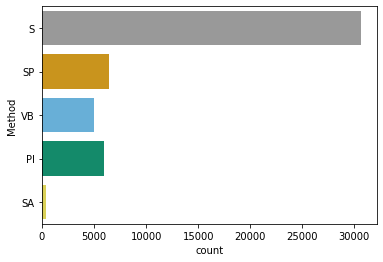

In [85]:
title = ''
sns.countplot(y = data['Method'])
plt.title(title)
plt.ioff()

In [86]:
#  https://www.datacamp.com/community/tutorials/categorical-data
# price_less['CouncilArea'].value_counts().count()

In [87]:
# price_less['CouncilArea'].value_counts()

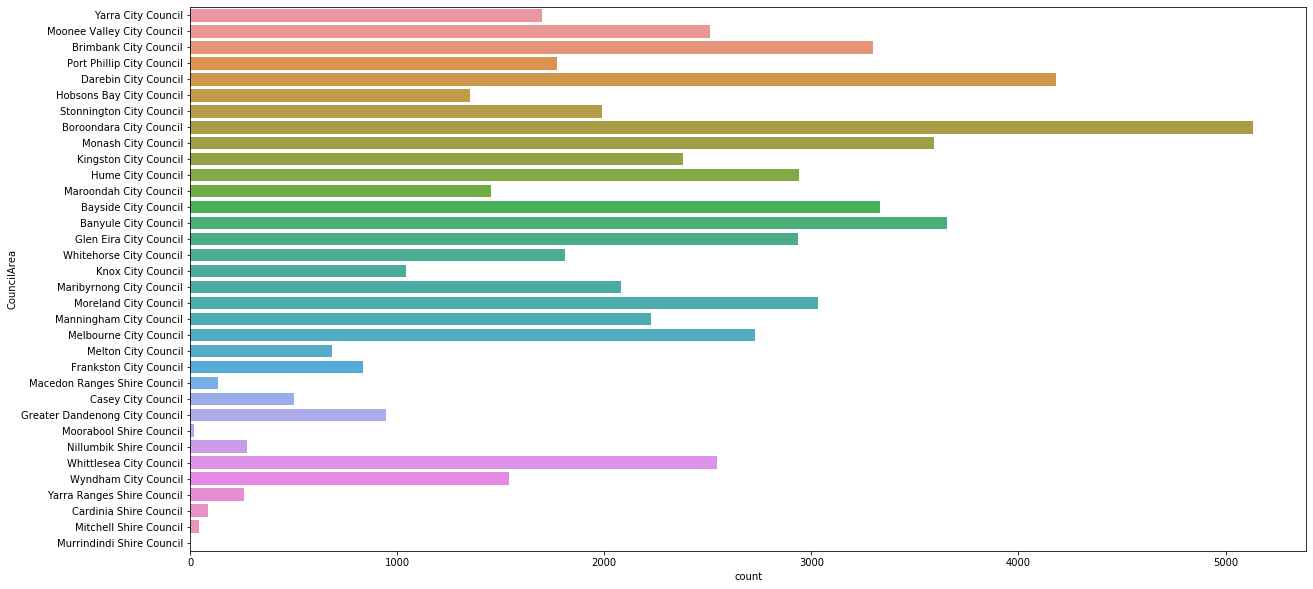

In [88]:
title = ''
plt.figure(figsize=(20,10))
sns.countplot(y = price_less['CouncilArea'])
plt.title(title)
plt.ioff()

In [89]:
# title = ''
# plt.figure(figsize=(20,10))
# sns.countplot(y = price_less['SellerG'])
# plt.title(title)
# plt.ioff()

In [90]:
data['SellerG'].value_counts().count()

422

In [91]:
data['Postcode'].value_counts().count()

221

## 3. Visualization

## 3.1 Price vs continous variables

In [92]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [93]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Postcode', 'Regionname', 'Propertycount', 'Distance',
       'CouncilArea'],
      dtype='object')

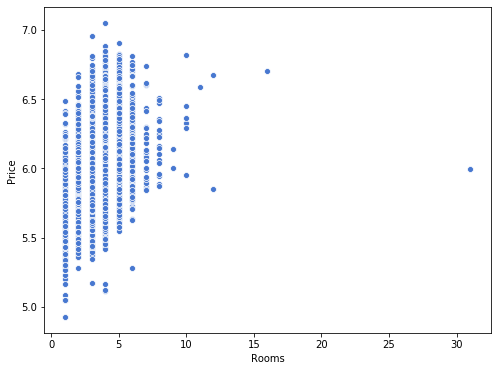

In [94]:
# see https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.set_palette("muted")
x = 'Rooms'
# x = np.log10(data["Rooms"])
# y = 'Price'
y = np.log10(data["Price"])

title = ''
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=x, y=y, data=data)
plt.title(title)
plt.ioff()
sns.set_palette(cbPalette)

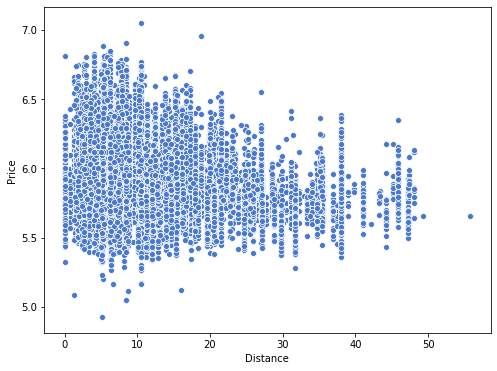

In [95]:
sns.set_palette("muted")
x = "Distance"
y = np.log10(data["Price"])

title = ''
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=x, y=y, data=data)
plt.title(title)
plt.ioff()
sns.set_palette(cbPalette)

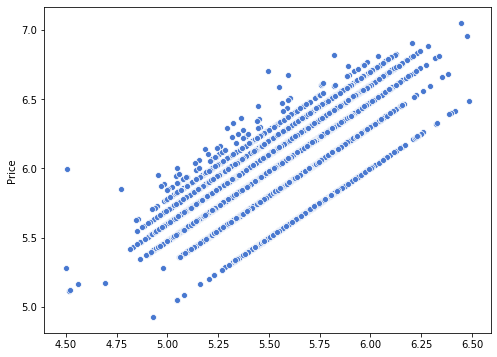

In [96]:
sns.set_palette("muted")
x = np.log10(data["Price"] / data["Rooms"])
y = np.log10(data["Price"])

title = ''
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=x, y=y, data=data)
plt.title(title)
plt.ioff()
sns.set_palette(cbPalette)

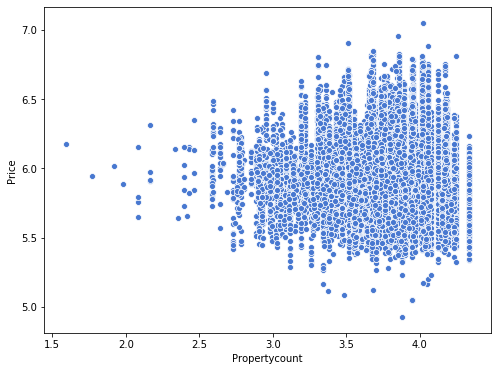

In [97]:
sns.set_palette("muted")
x = np.log10(data['Propertycount'])
# x = np.log10(data['Propertycount'] / data["Rooms"])
y = np.log10(data["Price"])

title = ''
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=x, y=y, data=data)
plt.title(title)
plt.ioff()
sns.set_palette(cbPalette)

## 3.2 Price vs categorical variables

In [98]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [99]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Postcode', 'Regionname', 'Propertycount', 'Distance',
       'CouncilArea'],
      dtype='object')

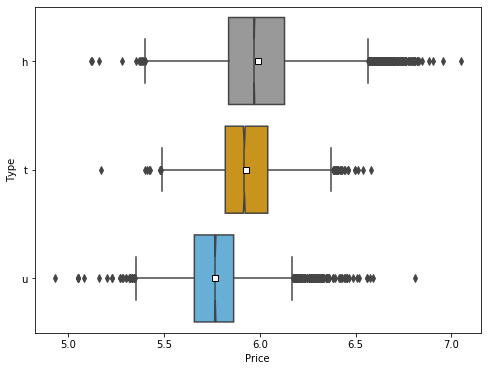

In [100]:
y="Type"
x=np.log10(data["Price"])

title = ""
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=x, y=y, data=data, notch=True, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)
plt.ioff()

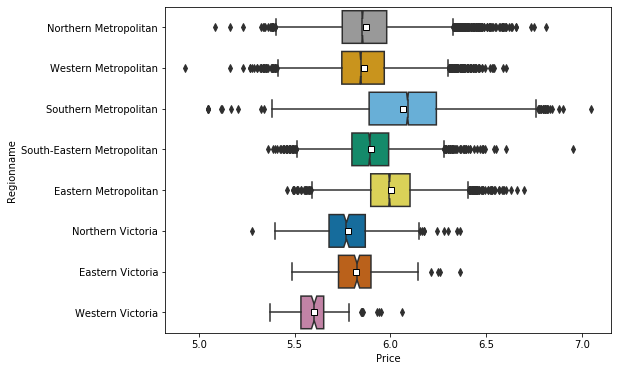

In [101]:
y="Regionname"
x=np.log10(data["Price"])
# x="Price"

title = ""
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=x, y=y, data=data, notch=True, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)
plt.ioff()

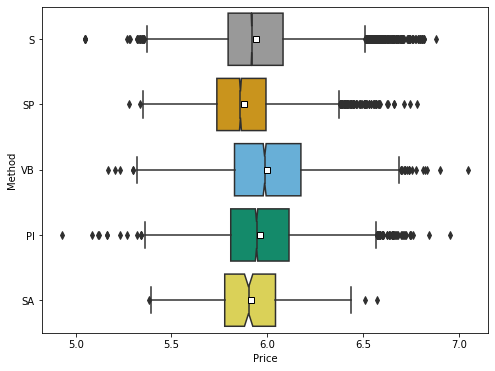

In [102]:
y="Method"
x=np.log10(data["Price"])
# x="Price"

title = ""
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=x, y=y, data=data, notch=True, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)
plt.ioff()

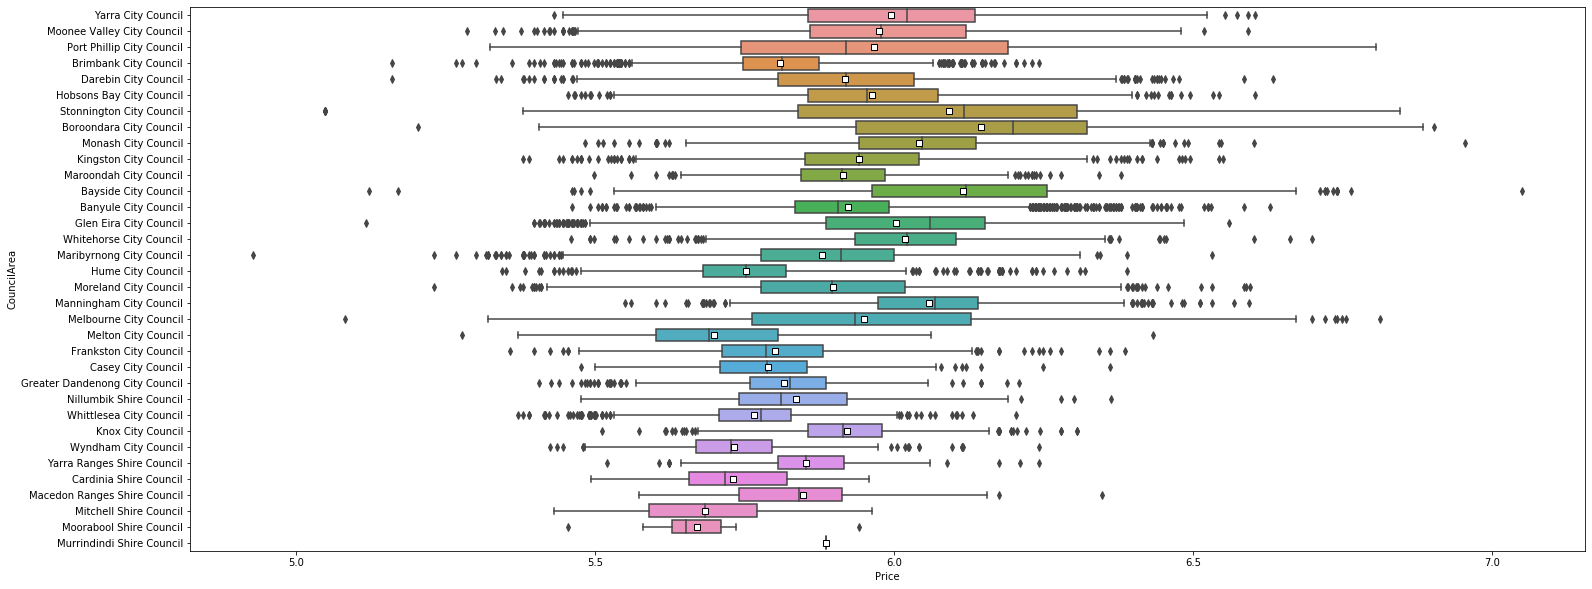

In [103]:
sns.set_palette("muted")
y="CouncilArea"
x=np.log10(data["Price"])
# x="Price"

title = ""
f, ax = plt.subplots(figsize=(25, 10))
sns.boxplot(x=x, y=y, data=data, notch=False, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)
plt.ioff()
sns.set_palette(cbPalette)

## 4. Models

### 4.1 Data Preprocessing

In [119]:
# https://stackoverflow.com/questions/31468176/setting-values-on-a-copy-of-a-slice-from-a-dataframe
data['Price/Rooms'] = (data.loc[:, "Price"] / data.loc[:, "Rooms"])

In [120]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Postcode', 'Regionname', 'Propertycount', 'Distance',
       'CouncilArea', 'Price/Rooms'],
      dtype='object')

In [121]:
data.drop(['Date', 'Address'], axis=1, inplace=True)

In [122]:
data.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Postcode,Regionname,Propertycount,Distance,CouncilArea,Price/Rooms
0,Abbotsford,3,h,1490000.0,S,Jellis,3067,Northern Metropolitan,4019,3.0,Yarra City Council,496666.666667
1,Abbotsford,3,h,1220000.0,S,Marshall,3067,Northern Metropolitan,4019,3.0,Yarra City Council,406666.666667
2,Abbotsford,3,h,1420000.0,S,Nelson,3067,Northern Metropolitan,4019,3.0,Yarra City Council,473333.333333
3,Aberfeldie,3,h,1515000.0,S,Barry,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council,505000.000000
4,Airport West,2,h,670000.0,S,Nelson,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council,335000.000000


In [123]:
# Encoding categorical data
# https://pbpython.com/categorical-encoding.html
data = pd.get_dummies(data, columns=['Suburb', 'Rooms', 'Type',  'Method', 'SellerG', 'Regionname', 'CouncilArea'], drop_first=True)

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48433 entries, 0 to 63020
Columns: 854 entries, Price to CouncilArea_Yarra Ranges Shire Council
dtypes: float64(3), int64(2), uint8(849)
memory usage: 41.4 MB


In [126]:
# Split the dataset
X = data.drop('Price', axis=1).values
y = data['Price'].values
y = np.log10(y)

### 4.2 Multiple Linear Regression

In [127]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predicting the Test set results
y_pred = lr.predict(X_test)

In [129]:
# Compare predicted and actual values
# https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f
# https://stackoverflow.com/questions/19100540/rounding-entries-in-a-pandas-dafaframe
df = pd.DataFrame({'Actual': np.round(y_test, 2), 
                   'Predicted': np.round(y_pred, 2)})
df.head(10)

,Actual,Predicted
0,5.84,5.80
1,5.66,5.74
2,5.86,5.90
3,5.94,5.90
4,5.97,5.94
5,5.60,5.66
6,6.14,6.17
7,5.91,5.87
8,5.85,5.86
9,5.89,5.86


In [130]:
# https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f
# https://www.theanalysisfactor.com/assessing-the-fit-of-regression-models/
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score

print('Price mean:', np.round(np.mean(y), 2))  
print('Price std:', np.round(np.std(y), 2))
print('RMSE:', np.round(np.sqrt(metrics.mean_squared_error(y_test, lr.predict(X_test))), 2))
print('R2 score train:', np.round(r2_score(y_train, lr.predict(X_train), multioutput='variance_weighted'), 2))
print('R2 score test:', np.round(r2_score(y_test, lr.predict(X_test), multioutput='variance_weighted'), 2))

Price mean: 5.94
Price std: 0.22
RMSE: 0.05
R2 score train: 0.95
R2 score test: 0.95


## 5. Conclusions
* Price is clearly proportional to the Distance and Rooms number variables
* Multiple linear regression performs well on this dataset

## 6. References

* https://www.kaggle.com/lpuglisi/visualizing-melbourne-real-estate 
* https://www.kaggle.com/anthonypino/price-analysis-and-linear-regression
* https://www.kaggle.com/emanueleamcappella/random-forest-hyperparameters-tunings
* https://www.datacamp.com/community/tutorials/categorical-data
* https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f
* https://www.theanalysisfactor.com/assessing-the-fit-of-regression-models/
* https://pbpython.com/categorical-encoding.html